<a href="https://colab.research.google.com/github/kishusingh62/dlp1/blob/main/3rd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 71ms/step - accuracy: 0.3582 - loss: 1.9761 - val_accuracy: 0.5583 - val_loss: 1.2722
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.5716 - loss: 1.2168 - val_accuracy: 0.6495 - val_loss: 0.9951
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 72ms/step - accuracy: 0.6403 - loss: 1.0312 - val_accuracy: 0.6839 - val_loss: 0.8909
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 70ms/step - accuracy: 0.6771 - loss: 0.9255 - val_accuracy: 0.6899 - val_loss: 0.8841
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 71ms/step - accuracy: 0.6995 - loss: 0.8699 - val_accuracy: 0.6791 - val_loss: 0.9321
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6774 - loss: 0.9282
Test Accuracy: 0.679099977016449


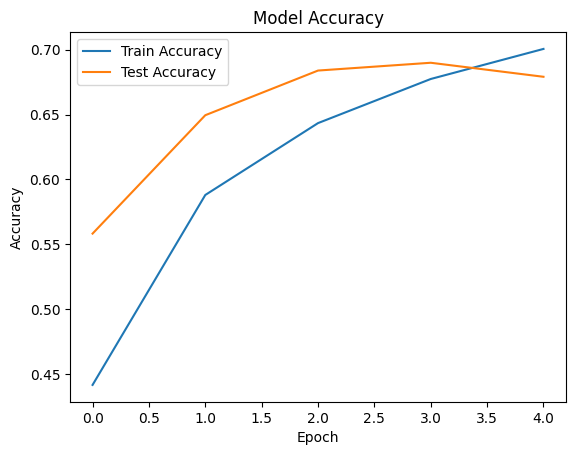

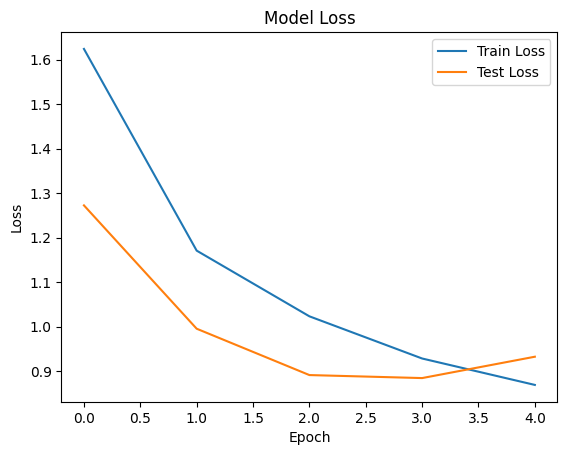

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_imgs, train_labels), (test_imgs, test_labels) = datasets.cifar10.load_data()
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Input shape updated for RGB images
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_imgs, train_labels, epochs=5, validation_data=(test_imgs, test_labels))

test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()
